In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from typing import List, Optional, Dict, Tuple
from tqdm import tqdm
import numpy as np
import os
import math

# Load the Data

In [2]:
# makes an object of all the prediction files
def parse_filename(filepath):
    """Extract residues and label from filename"""
    filename = os.path.basename(filepath)  # Get filename without path
    parts = filename.split('_')
    residues = parts[0]  # 'ST' or 'Y'
    label = parts[1]     # 'Phospho'
    return residues, label
    
def load_and_annotate_predictions(filepath):
    """Load a prediction file and add residues and label columns"""
    # Read the CSV
    df = pd.read_csv(filepath, sep=',')
    
    # Get residues and label from filename
    residues, label = parse_filename(filepath)
    
    # Add new columns
    df['residues'] = residues
    df['label'] = label
    
    return df

in order to get the prediction distributions for each model seperate, you can just simply remove one of the files and it will plot the distribution of the only Y or only ST

In [ ]:
# Read in the prediciton files
files = [
    "/home/sander/apps/slim/ptm_predictions/ST_Phospho_Human_Peptides_2,7,30_Preds.csv", # optional remove to get Y distribution
    "/home/sander/apps/slim/ptm_predictions/Y_Phospho_Human_Peptides_2,7,30_Preds.csv" # optional remove to get ST distribution
]  
modifications = pd.concat([load_and_annotate_predictions(f) for f in files], 
                        ignore_index=True)

In [4]:
modifications.head()

,prot_id,position,pred,residues,label
0,A0A075B706,1,0.1249,ST,Phospho
1,A0A075B706,10,0.1613,ST,Phospho
2,A0A075B706,13,0.1005,ST,Phospho
3,A0A0G2JS06,40,0.0442,ST,Phospho
4,A0A0G2JS06,42,0.0299,ST,Phospho


In [5]:
# Read the different Diann results
#diann_lf = pd.read_parquet("/home/sander/apps/slim/diann_results/diann_speclib_fasta.parquet") # optional
diann000 = pd.read_parquet("/public/compomics/sander/enriched/timsTOF_Pasef/diann_results/Enriched_000_speclib.parquet")
diann005 = pd.read_parquet("/public/compomics/sander/enriched/timsTOF_Pasef/diann_results/Enriched_005_control.parquet")
diann010 = pd.read_parquet("/public/compomics/sander/enriched/timsTOF_Pasef/diann_results/Enriched_010_control.parquet")
diann020 = pd.read_parquet("/public/compomics/sander/enriched/timsTOF_Pasef/diann_results/Enriched_020_control.parquet")
diann040 = pd.read_parquet("/public/compomics/sander/enriched/timsTOF_Pasef/diann_results/Enriched_040_control.parquet")
diann080 = pd.read_parquet("/public/compomics/sander/enriched/timsTOF_Pasef/diann_results/Enriched_080_control.parquet")
diann099 = pd.read_parquet("/public/compomics/sander/enriched/timsTOF_Pasef/diann_results/Enriched_099_control.parquet")

# make the diann_run_list
diann_runs_list = [diann000, diann005, diann010, diann020, diann040, diann080, diann099]

# display options: 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [6]:
diann000.head(100)

,Run.Index,Run,Channel,Precursor.Id,Precursor.Channels.Group,Modified.Sequence,Stripped.Sequence,Precursor.Charge,Precursor.Lib.Index,Proteotypic,Precursor.Mz,Protein.Ids,Protein.Group,Protein.Names,Genes,RT,iRT,Predicted.RT,Predicted.iRT,IM,iIM,Predicted.IM,Predicted.iIM,Precursor.Quantity,Precursor.Normalised,Ms1.Area,Ms1.Normalised,Ms1.Apex.Area,Ms1.Apex.Mz.Delta,Normalisation.Factor,Quantity.Quality,Empirical.Quality,Normalisation.Noise,Ms1.Profile.Corr,Averagine,Evidence,Mass.Evidence,Ms1.Total.Signal.Before,Ms1.Total.Signal.After,RT.Start,RT.Stop,FWHM,PG.Normalised,PG.MaxLFQ,Genes.Normalised,Genes.MaxLFQ,Genes.MaxLFQ.Unique,PG.MaxLFQ.Quality,Q.Value,PEP,Global.Q.Value,Lib.Q.Value,Peptidoform.Q.Value,Global.Peptidoform.Q.Value,Lib.Peptidoform.Q.Value,PTM.Q.Value,PTM.Site.Confidence,Site.Occupancy.Probabilities,Protein.Sites,Lib.PTM.Site.Confidence,Translated.Q.Value,Channel.Q.Value,PG.Q.Value,PG.PEP,GG.Q.Value,Protein.Q.Value,Global.PG.Q.Value,Lib.PG.Q.Value
0,0,tims_phospho_enriched_01,,AAAAAATAPPS(UniMod:21)PGPAQPGPR2,AAAAAATAPPS(UniMod:21)PGPAQPGPR2,AAAAAATAPPS(UniMod:21)PGPAQPGPR,AAAAAATAPPSPGPAQPGPR,2,774,1,918.444153,Q6SPF0,Q6SPF0,SAMD1_HUMAN,SAMD1,9.065639,68.044861,13.670475,22.755865,1.033958,436.924744,0.976324,438.092957,28790.849609,28810.886719,46592.871094,46625.296875,42370.726562,-0.002630,1.000696,0.922879,0.872024,-0.002941,0.849968,1.000000,3.025804,1.017761,20527454.0,20397580.0,8.973754,9.203465,0.137274,0.0,2.881090e+04,0.0,2.881090e+04,2.881090e+04,0.922879,0.000087,0.000087,0.000194,0.0,0.000447,0.000385,0.0,0.000447,1.000000,AAAAAAT{0.000000}APPS(UniMod:21){1.000000}PGPAQPGPR2,[Q6SPF0:S161],1.0,0.0,0.0,0.001399,0.003067,0.001400,0.000726,0.002096,0.0
1,1,tims_phospho_enriched_02,,AAAAAATAPPS(UniMod:21)PGPAQPGPR2,AAAAAATAPPS(UniMod:21)PGPAQPGPR2,AAAAAATAPPS(UniMod:21)PGPAQPGPR,AAAAAATAPPSPGPAQPGPR,2,774,1,918.444153,Q6SPF0,Q6SPF0,SAMD1_HUMAN,SAMD1,9.042973,68.044861,12.921282,22.882576,1.030313,436.924744,0.969501,435.687378,28939.601562,29251.273438,44344.644531,44822.222656,38951.472656,-0.000341,1.010770,0.925074,0.898398,0.003748,0.811941,1.000000,1.967375,1.269132,19214804.0,20043326.0,8.974055,9.180829,0.066065,0.0,2.925126e+04,0.0,2.925126e+04,2.925126e+04,0.925074,0.000194,0.000381,0.000194,0.0,0.000726,0.000385,0.0,0.000726,1.000000,AAAAAAT{0.000000}APPS(UniMod:21){1.000000}PGPAQPGPR2,[Q6SPF0:S161],1.0,0.0,0.0,0.002149,0.004307,0.002151,0.002116,0.002096,0.0
2,2,tims_phospho_enriched_03,,AAAAAATAPPS(UniMod:21)PGPAQPGPR2,AAAAAATAPPS(UniMod:21)PGPAQPGPR2,AAAAAATAPPS(UniMod:21)PGPAQPGPR,AAAAAATAPPSPGPAQPGPR,2,774,1,918.444153,Q6SPF0,Q6SPF0,SAMD1_HUMAN,SAMD1,9.043740,68.044861,13.142678,23.959103,1.041136,436.924744,0.955606,438.886597,36573.925781,36558.390625,48946.718750,48925.929688,41479.441406,-0.005108,0.999575,0.934206,0.865051,-0.010235,0.959284,1.000000,2.890970,0.800017,19966608.0,20111856.0,8.951832,9.250480,0.058336,0.0,3.655840e+04,0.0,3.655840e+04,3.655840e+04,0.934206,0.000146,0.000146,0.000194,0.0,0.000379,0.000385,0.0,0.000379,1.000000,AAAAAAT{0.000000}APPS(UniMod:21){1.000000}PGPAQPGPR2,[Q6SPF0:S161],1.0,0.0,0.0,0.000608,0.001093,0.000609,0.001318,0.002096,0.0
3,3,tims_phospho_enriched_04,,AAAAAATAPPS(UniMod:21)PGPAQPGPR2,AAAAAATAPPS(UniMod:21)PGPAQPGPR2,AAAAAATAPPS(UniMod:21)PGPAQPGPR,AAAAAATAPPSPGPAQPGPR,2,774,1,918.444153,Q6SPF0,Q6SPF0,SAMD1_HUMAN,SAMD1,9.065917,68.044861,12.662372,19.666105,1.031458,436.924744,0.994055,436.868622,48672.488281,47656.863281,46507.695312,45537.242188,39447.449219,-0.000897,0.979133,0.954413,0.926482,0.002806,0.992202,1.000000,3.942372,1.171658,20467630.0,20443544.0,8.974010,9.249701,0.093743,0.0,4.765686e+04,0.0,4.765686e+04,4.765686e+04,0.954413,0.000011,0.000011,0.000194,0.0,0.000732,0.000385,0.0,0.000732,1.000000,AAAAAAT{0.000000}APPS(UniMod:21){1.000000}PGPAQPGPR2,[Q6SPF0:S161],1.0,0.0,0.0,0.000524,0.001041,0.000524,0.000518,0.002096,0.0
4,0,tims_phospho_enriched_01,,AAAASAAEAGIAT(UniMod:21)T(UniMod:21)GTEDS(UniMod:21)DDALLK3,AAAASAAEAG

In [7]:
def parse_filename(filepath):
    """Extract residues and label from filename"""
    filename = os.path.basename(filepath)  # Get filename without path
    parts = filename.split('_')
    residues = parts[0]  # 'ST' or 'Y'
    label = parts[1]     # 'Phospho'
    return residues, label
    
def load_and_annotate_predictions(filepath):
    """Load a prediction file and add residues and label columns"""
    # Read the CSV
    df = pd.read_csv(filepath, sep=',')
    
    # Get residues and label from filename
    residues, label = parse_filename(filepath)
    
    # Add new columns
    df['residues'] = residues
    df['label'] = label
    
    return df

In [8]:
def process_diann_results(diann_runs_list, run_ids):
    """
    Processes multiple DIA-NN result sets and combines them into a single DataFrame.
    Similar structure to the AlphaDIA processing, but adapted for DIA-NN's data format.
    
    Args:
        diann_runs_list: List of DataFrames containing DIA-NN results from different thresholds
        run_ids: List of analysis identifiers (e.g., '000', '005', etc.)
    
    Returns:
        DataFrame: Combined results with consistent format for comparison with AlphaDIA
    """
    print("Starting DIA-NN data processing...")
    
    # Dictionary to store all unique precursor IDs and their data
    precursor_data = {}
    all_runs = set()
    
    # Dictionary to store peptide metadata that stays constant across runs
    peptide_metadata = {}
    
    # Process each analysis set
    for df, run_id in tqdm(zip(diann_runs_list, run_ids), total=len(run_ids), desc="Processing analysis sets"):
        print(f"\nAnalysis {run_id}:")
        print(f"Total identifications: {len(df)}")
        
        # Process each precursor in this analysis
        for _, row in df.iterrows():
            # Get the precursor ID directly - it already has the charge
            precursor_id = row['Precursor.Id']
            
            # Store metadata if we haven't seen this precursor before
            if precursor_id not in peptide_metadata:
                peptide_metadata[precursor_id] = {
                    'StrippedPeptide': row['Stripped.Sequence'],
                    'ModifiedPeptide': row['Modified.Sequence'],
                    'proteins': row['Protein.Ids'],
                    # We'll extract charge from the Precursor.Id which has it at the end
                    'charge': int(precursor_id[-1]) if precursor_id[-1].isdigit() else None
                }
            
            # Get the run identifier from the data
            run = row['Run']  # Adjust this if the run column has a different name
            all_runs.add(run)
            
            # Initialize nested dictionaries if needed
            if precursor_id not in precursor_data:
                precursor_data[precursor_id] = {}
            if run not in precursor_data[precursor_id]:
                precursor_data[precursor_id][run] = {}
            
            # Store the data for this analysis
            precursor_data[precursor_id][run][run_id] = {
                'found': True,
                'qval': row['Global.Peptidoform.Q.Value'],
                'proba': row['PEP']
            }
    
    print("\nCreating final DataFrame...")
    
    # Convert the nested dictionary structure to a list of rows
    rows = []
    all_runs = sorted(all_runs)
    
    # Create rows for each precursor-run combination
    for precursor_id in tqdm(precursor_data.keys(), desc="Building final matrix"):
        metadata = peptide_metadata[precursor_id]
        
        for run in all_runs:
            # Initialize row with precursor_id, run, and metadata
            row = {
                'precursor_id': precursor_id,
                'run': run,
                'StrippedPeptide': metadata['StrippedPeptide'],
                'ModifiedPeptide': metadata['ModifiedPeptide'],
                'proteins': metadata['proteins'],
                'charge': metadata['charge']
            }
            
            # Add data for each analysis
            for run_id in run_ids:
                analysis_data = (precursor_data.get(precursor_id, {})
                               .get(run, {})
                               .get(run_id, {'found': False, 'qval': np.nan, 'proba': np.nan}))
                
                row[f'{run_id}_found'] = analysis_data['found']
                row[f'{run_id}_qval'] = analysis_data['qval']
                row[f'{run_id}_proba'] = analysis_data['proba']
            
            rows.append(row)
    
    # Create the final DataFrame
    final_df = pd.DataFrame(rows)
    
    # Generate summary statistics
    print("\nGenerating summary statistics...")
    summary_stats = pd.DataFrame([{
        'run_id': run_id,
        'total_precursors': len(final_df[f'{run_id}_found']),
        'identified_precursors': final_df[f'{run_id}_found'].sum(),
        'mean_qval': final_df[final_df[f'{run_id}_found']][f'{run_id}_qval'].mean(),
        'median_qval': final_df[final_df[f'{run_id}_found']][f'{run_id}_qval'].median(),
        'mean_proba': final_df[final_df[f'{run_id}_found']][f'{run_id}_proba'].mean(),
        'median_proba': final_df[final_df[f'{run_id}_found']][f'{run_id}_proba'].median()
    } for run_id in run_ids])
    
    return final_df, summary_stats

# Let's use this function to process our DIA-NN data
run_ids = ['000', '005', '010', '020', '040', '080', '099']
diann_result_df, diann_summary_stats = process_diann_results(diann_runs_list, run_ids)

# Sort the results consistently
diann_result_df = diann_result_df.sort_values(['precursor_id', 'run'])

# Let's examine some of the phosphopeptides
print("\nSample of phosphopeptides from DIA-NN analysis:")
phospho_mask = diann_result_df['ModifiedPeptide'].str.contains('UniMod:21', na=False)
print(f"Total phosphopeptides found: {phospho_mask.sum()}")
diann_result_df[phospho_mask].head()

Starting DIA-NN data processing...


Processing analysis sets:   0%|          | 0/7 [00:00<?, ?it/s]


Analysis 000:
Total identifications: 50743


Processing analysis sets:  14%|█▍        | 1/7 [00:01<00:08,  1.34s/it]


Analysis 005:
Total identifications: 42714


Processing analysis sets:  29%|██▊       | 2/7 [00:02<00:06,  1.31s/it]


Analysis 010:
Total identifications: 100800


Processing analysis sets:  43%|████▎     | 3/7 [00:05<00:07,  1.86s/it]


Analysis 020:
Total identifications: 24832


Processing analysis sets:  57%|█████▋    | 4/7 [00:05<00:04,  1.42s/it]


Analysis 040:
Total identifications: 14142


Processing analysis sets:  86%|████████▌ | 6/7 [00:06<00:00,  1.36it/s]


Analysis 080:
Total identifications: 7034

Analysis 099:
Total identifications: 3442


Processing analysis sets: 100%|██████████| 7/7 [00:06<00:00,  1.08it/s]



Creating final DataFrame...


Building final matrix: 100%|██████████| 110190/110190 [00:02<00:00, 51924.95it/s]



Generating summary statistics...

Sample of phosphopeptides from DIA-NN analysis:
Total phosphopeptides found: 240964


,precursor_id,run,StrippedPeptide,ModifiedPeptide,proteins,charge,000_found,000_qval,000_proba,005_found,005_qval,005_proba,010_found,010_qval,010_proba,020_found,020_qval,020_proba,040_found,040_qval,040_proba,080_found,080_qval,080_proba,099_found,099_qval,099_proba
256832,AAAAAAALQAKS(UniMod:21)DEKAAVAGK3,tims_phospho_enriched_01,AAAAAAALQAKSDEKAAVAGK,AAAAAAALQAKS(UniMod:21)DEKAAVAGK,P36578,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
256833,AAAAAAALQAKS(UniMod:21)DEKAAVAGK3,tims_phospho_enriched_02,AAAAAAALQAKSDEKAAVAGK,AAAAAAALQAKS(UniMod:21)DEKAAVAGK,P36578,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
256834,AAAAAAALQAKS(UniMod:21)DEKAAVAGK3,tims_phospho_enriched_03,AAAAAAALQAKSDEKAAVAGK,AAAAAAALQAKS(UniMod:21)DEKAAVAGK,P36578,3,False,NaN,NaN,False,NaN,NaN,True,1.0,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
256835,AAAAAAALQAKS(UniMod:21)DEKAAVAGK3,tims_phospho_enriched_04,AAAAAAALQAKSDEKAAVAGK,AAAAAAALQAKS(UniMod:21)DEKAAVAGK,P36578,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN
256836,AAAAAART(UniMod:21)AFSQVVASHR2,tims_phospho_enriched_01,AAAAAARTAFSQVVASHR,AAAAAART(UniMod:21)AFSQVVASHR,Q96JG8,2,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN


# add the modifications predictions

In [9]:
def read_proteome(canonical_proteome):
    """
    Reads the proteome sequences from the FASTA file, filters X and U aa from proteome

    Parameters:
    canonical_proteome : str
        Path to the FASTA file containing the proteome sequences

    Returns:
    dict
        A dictionary where keys are protein IDs and values are sequences
        {prot1: 'PEPTIDERRRPEPTIDE...', ...}
    """
    sequences = {}  # {prot_id: sequence}
    with open(canonical_proteome, 'r') as f:
        prot_id = None
        seq_lines = []
        for line in f:
            line = line.strip()
            if line.startswith('>'):
                if prot_id:
                    sequence = ''.join(seq_lines)
                    if 'U' not in sequence and 'X' not in sequence:
                        sequences[prot_id] = sequence
                    seq_lines = []
                prot_id = line[1:].split()[0]
            else:
                seq_lines.append(line)
        if prot_id:
            sequence = ''.join(seq_lines)
            if 'U' not in sequence and 'X' not in sequence:
                sequences[prot_id] = sequence
    return sequences

In [10]:
canonical_proteome = '/home/sander/apps/slim/general_data/UP000005640_9606_prot_id.fasta'
proteome = read_proteome(canonical_proteome)

In [11]:
# we digest the proteome just like we did when making the library: we can use peptide start position to quickly find the postions of the target modifications:
def digest_protein(sequence, missed_cleavages=0, min_length=0, max_length=None):
    """
    Performs trypsin digestion on a single protein sequence.

    Args:
        sequence (str): Protein sequence
        missed_cleavages (int): Number of allowed missed cleavages
        min_length (int): Minimum peptide length
        max_length (int): Maximum peptide length (None for no limit)

    Returns:
        list: List of tuples (peptide, start_pos) where start_pos is 0-based

    Example:
        Input: "PEPTIDERPRRPEPTIDE"
        Output: [('PEPTIDER', 0), ('PEPTIDERR', 0), ..., ('RPEPTIDE', 9)]
    """
    cleavage_sites = []
    for i in range(len(sequence) - 1):
        if sequence[i] in ('K', 'R'):
            cleavage_sites.append(i+1)
    cleavage_sites = [0] + cleavage_sites + [len(sequence)]
    
    peptides = []
    for start_idx in range(len(cleavage_sites)-1):
        for end_idx in range(start_idx+1, min(len(cleavage_sites), start_idx+missed_cleavages+2)):
            pep_start = cleavage_sites[start_idx]
            pep_end = cleavage_sites[end_idx]
            peptide = sequence[pep_start:pep_end]
            if min_length <= len(peptide) <= (max_length if max_length else len(peptide)):
                # Validate that the peptide actually starts at pep_start
                assert sequence[pep_start:pep_start+len(peptide)] == peptide
                peptides.append((peptide, pep_start))
    return peptides

def calculate_miscleavages(peptide_seq, protein_seq, start_pos):
    """
    Calculates the number of missed cleavages in a single peptide.

    Args:
        peptide_seq (str): Peptide sequence
        protein_seq (str): Full protein sequence
        start_pos (int): Start position of peptide in protein (0-based)

    Returns:
        int: Number of missed cleavages

    Example:
        Input: ('PEPTIDERPR', 'PEPTIDERPRRPEPTIDE', 0)
        Output: 1
    """
    # Validate that the peptide actually occurs at start_pos
    assert protein_seq[start_pos:start_pos+len(peptide_seq)] == peptide_seq, \
           f"Peptide {peptide_seq} not found at position {start_pos} in protein"
    
    miscleavages = 0
    for i in range(len(peptide_seq)-1):  # Changed range to avoid going past peptide end
        abs_pos = start_pos + i  # Removed the -1 offset
        if protein_seq[abs_pos] in ('K', 'R'):
            miscleavages += 1
    return miscleavages

def trypsin_digest(sequences, missed_cleavages, min_length, max_length):
    """
    Performs trypsin digestion on all protein sequences.
    
    Args:
        sequences (dict): Dictionary of protein sequences {prot_id: sequence}
        missed_cleavages (int): Number of allowed missed cleavages
        min_length (int): Minimum peptide length
        max_length (int): Maximum peptide length

    Returns:
        list: List of dictionaries containing peptide information
        
    Example:
        Input: {'prot1': 'PEPTIDERRRPEPTIDE...', ...}
        Output: [{'prot_id': 'prot1', 'sequence': 'PEPTIDERPR', 'miscleavages': 1, 
                 'peptide_length': 10, 'start_pos': 0}, ...]
    """
    digested_peptides = []
    for prot_id, seq in sequences.items():
        peptides = digest_protein(seq, missed_cleavages, min_length, max_length)
        for peptide, start_pos in peptides:
            # Validate peptide position
            assert seq[start_pos:start_pos+len(peptide)] == peptide, \
                   f"Position mismatch for peptide {peptide} in protein {prot_id}"
            
            miscleavages = calculate_miscleavages(peptide, seq, start_pos)
            digested_peptides.append({
                'prot_id': prot_id,
                'sequence': peptide,
                'miscleavages': miscleavages,
                'peptide_length': len(peptide),
                'start_pos': start_pos
            })
    return digested_peptides

In [12]:
peptides = trypsin_digest(sequences = proteome, missed_cleavages = 2, min_length = 7, max_length = 30)
peptides

[{'prot_id': 'A0A075B706',
  'sequence': 'TDKLIFGK',
  'miscleavages': 1,
  'peptide_length': 8,
  'start_pos': 0},
 {'prot_id': 'A0A075B706',
  'sequence': 'TDKLIFGKGTR',
  'miscleavages': 2,
  'peptide_length': 11,
  'start_pos': 0},
 {'prot_id': 'A0A075B706',
  'sequence': 'LIFGKGTR',
  'miscleavages': 1,
  'peptide_length': 8,
  'start_pos': 3},
 {'prot_id': 'A0A075B706',
  'sequence': 'LIFGKGTRVTVEP',
  'miscleavages': 2,
  'peptide_length': 13,
  'start_pos': 3},
 {'prot_id': 'A0A075B706',
  'sequence': 'GTRVTVEP',
  'miscleavages': 1,
  'peptide_length': 8,
  'start_pos': 8},
 {'prot_id': 'A0A0G2JS06',
  'sequence': 'FTCTLRSGINVGTYR',
  'miscleavages': 1,
  'peptide_length': 15,
  'start_pos': 38},
 {'prot_id': 'A0A0G2JS06',
  'sequence': 'FTCTLRSGINVGTYRIYWYQQK',
  'miscleavages': 2,
  'peptide_length': 22,
  'start_pos': 38},
 {'prot_id': 'A0A0G2JS06',
  'sequence': 'SGINVGTYR',
  'miscleavages': 0,
  'peptide_length': 9,
  'start_pos': 44},
 {'prot_id': 'A0A0G2JS06',
  'seque

In [13]:
def add_modification_predictions(diann_result_df, peptides, modifications):
    """
    Maps modification predictions to DIA-NN peptides, handling multiple UniMod modifications per peptide.
    Stores predictions for up to 3 modification sites per peptide in separate columns.
    """
    import pandas as pd
    import numpy as np
    import re

    print("Adding modification predictions to DIA-NN results...")

    # Create lookup dictionaries
    peptides_dict = {}
    for p in peptides:
        key = (p['prot_id'], p['sequence'])
        if key not in peptides_dict:
            peptides_dict[key] = []
        peptides_dict[key].append(p['start_pos'])

    modifications['position'] = modifications['position'].astype(int)
    mod_dict = modifications.set_index(['prot_id', 'position'])['pred'].to_dict()

    def get_mod_indices(modified_peptide):
        """
        Identifies positions of UniMod:21 modifications in a peptide sequence.
        Returns indices relative to the unmodified sequence.
        
        For example:
        "AAAS(UniMod:21)AA" -> [3]  # S is at index 3
        "AAS(UniMod:21)AS(UniMod:21)A" -> [2, 4]  # S's are at indices 2 and 4
        """
        indices = []
        current_pos = -1  # Start at -1 since we increment before checking
        i = 0
        
        while i < len(modified_peptide):
            if modified_peptide[i] == '(':
                # Found a modification, check if it's UniMod:21
                next_paren = modified_peptide.find(')', i)
                if next_paren != -1:
                    mod = modified_peptide[i:next_paren + 1]
                    if mod == '(UniMod:21)':
                        indices.append(current_pos)  # Add position of the modified residue
                    i = next_paren + 1  # Skip past the modification
                else:
                    i += 1  # Malformed modification, just move on
            else:
                current_pos += 1  # Count this as a position in the unmodified sequence
                i += 1
                
        return indices

    def get_prediction_for_peptide(row):
        """
        Gets predictions for all modification sites in a peptide.
        Returns predictions for up to 3 modification sites.
        """
        # Initialize result dictionary with default values for all sites
        result = {}
        for site in range(1, 4):  # Sites 1-3
            result.update({
                f'prediction_site{site}': np.nan,
                f'protein_site{site}': None,
                f'position_site{site}': None
            })

        if '(UniMod:21)' not in row['ModifiedPeptide']:
            return pd.Series(result)

        try:
            # Get positions of all UniMod:21 modifications
            mod_indices = get_mod_indices(row['ModifiedPeptide'])
            site_predictions = []

            # Check each protein and modification site
            for protein in row['proteins'].split(';'):
                start_positions = peptides_dict.get((protein, row['StrippedPeptide']), [])
                
                for start_pos in start_positions:
                    for mod_index in mod_indices:
                        abs_position = start_pos + mod_index + 1  # +1 for 1-based indexing
                        prediction = mod_dict.get((protein, abs_position))
                        
                        if prediction is not None:
                            site_predictions.append({
                                'protein': protein,
                                'position': abs_position,
                                'prediction': prediction
                            })

            # Sort predictions by score and assign to sites
            if site_predictions:
                site_predictions.sort(key=lambda x: x['prediction'], reverse=True)
                for site_num, pred in enumerate(site_predictions[:3], 1):
                    result[f'prediction_site{site_num}'] = pred['prediction']
                    result[f'protein_site{site_num}'] = pred['protein']
                    result[f'position_site{site_num}'] = pred['position']

        except Exception as e:
            print(f"Error processing row with ModifiedPeptide: {row['ModifiedPeptide']}")
            print(f"Error details: {str(e)}")

        return pd.Series(result)

    # Process peptides and add predictions
    print("Calculating predictions for each peptide...")
    new_columns = diann_result_df.apply(get_prediction_for_peptide, axis=1)

    # Add prediction columns to the dataframe
    for site in range(1, 4):
        for field in ['prediction', 'protein', 'position']:
            column_name = f'{field}_site{site}'
            diann_result_df[column_name] = new_columns[column_name]

    # Print summary statistics
    print("\nProcessing complete. Summary of modifications:")
    has_phospho = diann_result_df['ModifiedPeptide'].str.contains('UniMod:21', na=False)
    total_phospho = has_phospho.sum()
    print(f"Total phosphopeptides: {total_phospho}")
    
    for site in range(1, 4):
        has_prediction = diann_result_df[f'prediction_site{site}'].notna()
        print(f"Peptides with {site} mapped modification site(s): {has_prediction.sum()}")

    return diann_result_df

In [14]:
# Run the function
result_with_predictions = add_modification_predictions(diann_result_df, peptides, modifications)
# Display the results
result_with_predictions.head(10)

Adding modification predictions to DIA-NN results...
Calculating predictions for each peptide...

Processing complete. Summary of modifications:
Total phosphopeptides: 240964
Peptides with 1 mapped modification site(s): 240964
Peptides with 2 mapped modification site(s): 79132
Peptides with 3 mapped modification site(s): 19212


,precursor_id,run,StrippedPeptide,ModifiedPeptide,proteins,charge,000_found,000_qval,000_proba,005_found,005_qval,005_proba,010_found,010_qval,010_proba,020_found,020_qval,020_proba,040_found,040_qval,040_proba,080_found,080_qval,080_proba,099_found,099_qval,099_proba,prediction_site1,protein_site1,position_site1,prediction_site2,protein_site2,position_site2,prediction_site3,protein_site3,position_site3
125812,AAAAAAAAAAAAAAAASAGGKEAASGPNDS2,tims_phospho_enriched_01,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,P0CG40,2,False,NaN,NaN,True,0.891739,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125813,AAAAAAAAAAAAAAAASAGGKEAASGPNDS2,tims_phospho_enriched_02,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,P0CG40,2,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125814,AAAAAAAAAAAAAAAASAGGKEAASGPNDS2,tims_phospho_enriched_03,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,P0CG40,2,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125815,AAAAAAAAAAAAAAAASAGGKEAASGPNDS2,tims_phospho_enriched_04,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,P0CG40,2,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125816,AAAAAAAAAASGAAIPPLIPPRR2,tims_phospho_enriched_01,AAAAAAAAAASGAAIPPLIPPRR,AAAAAAAAAASGAAIPPLIPPRR,O14654,2,False,NaN,NaN,True,0.406450,1.0,False,NaN,NaN,True,0.61416,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125817,AAAAAAAAAASGAAIPPLIPPRR2,tims_phospho_enriched_02,AAAAAAAAAASGAAIPPLIPPRR,AAAAAAAAAASGAAIPPLIPPRR,O14654,2,False,NaN,NaN,False,NaN,NaN,True,0.213555,0.162028,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125818,AAAAAAAAAASGAAIPPLIPPRR2,tims_phospho_enriched_03,AAAAAAAAAASGAAIPPLIPPRR,AAAAAAAAAASGAAIPPLIPPRR,O14654,2,False,NaN,NaN,False,NaN,NaN,True,0.213555,1.000000,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125819,AAAAAAAAAASGAAIPPLIPPRR2,tims_phospho_enriched_04,AAAAAAAAAASGAAIPPLIPPRR,AAAAAAAAAASGAAIPPLIPPRR,O14654,2,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256828,AAAAAAAAGAFAGRRAAC(UniMod:4)GAVLLTELLER3,tims_phospho_enriched_01,AAAAAAAAGAFAGRRAACGAVLLTELLER,AAAAAAAAGAFAGRRAAC(UniMod:4)GAVLLTELLER,Q8N697,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256829,AAAAAAAAGAFAGRRAAC(UniMod:4)GAVLLTELLER3,tims_phospho_enriched_02,AAAAAAAAGAFAGRRAACGAVLLTELLER,AAAAAAAAGAFAGRRAAC(UniMod:4)GAVLLTELLER,Q8N697,3,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Analysis

In [15]:
def create_waterfall_plot(result_df, thresholds=['000', '005', '010', '020', '040', '080', '099']):
    """
    Creates a waterfall plot comparing phosphopeptide identifications across different score thresholds.
    Adapted for the new dataframe format using UniMod notation for modifications.
    
    Parameters:
    result_df: DataFrame containing the analysis results with UniMod modification notation
    thresholds: List of threshold values to analyze
    
    The function identifies phosphopeptides by looking for UniMod:21 in the ModifiedPeptide column,
    which is the UniMod notation for phosphorylation.
    """
    # Filter for phosphopeptides using UniMod notation
    phospho_mask = result_df['ModifiedPeptide'].str.contains('UniMod:21', na=False)
    phospho_df = result_df[phospho_mask].copy()
    
    # Get baseline identifications (000) with proper error handling
    baseline_mask = (
        phospho_df['000_found'] & 
        (phospho_df['000_qval'].fillna(1) <= 0.01) & 
        (phospho_df['000_proba'].fillna(1) <= 0.01)
    )
    baseline_ids = set(phospho_df[baseline_mask].precursor_id)
    
    # Initialize result lists for tracking changes across thresholds
    retained = [len(baseline_ids)]  # Number of peptides kept from baseline
    lost = [0]  # Number of peptides lost compared to baseline
    novel = [0]  # Number of new peptides not in baseline
    
    # Calculate statistics for each threshold with robust error handling
    for thresh in thresholds[1:]:
        thresh_mask = (
            phospho_df[f'{thresh}_found'] & 
            (phospho_df[f'{thresh}_qval'].fillna(1) <= 0.01) & 
            (phospho_df[f'{thresh}_proba'].fillna(1) <= 0.01)
        )
        thresh_ids = set(phospho_df[thresh_mask].precursor_id)
        
        # Calculate metrics
        retained.append(len(baseline_ids & thresh_ids))  # Intersection with baseline
        lost.append(-len(baseline_ids - thresh_ids))    # Lost from baseline
        novel.append(len(thresh_ids - baseline_ids))    # New identifications
    
    # Create figure with specific size
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot stacked bars with meaningful colors
    x = np.arange(len(thresholds))
    width = 0.8
    retained_bars = ax.bar(x, retained, width, label='Retained from Baseline', color='lightblue')
    lost_bars = ax.bar(x, lost, width, label='Lost compared to Baseline', color='salmon')
    novel_bars = ax.bar(x, novel, width, bottom=retained, label='Novel compared to Baseline', color='lightgreen')
    
    # Add horizontal reference line at y=0
    ax.axhline(y=0, color='black', linewidth=2)
    
    # Set fixed y-axis limits and ticks for consistency
    ax.set_ylim(-6000, 6000)
    y_ticks = np.arange(-6000, 6001, 1500)
    ax.set_yticks(y_ticks)
    ax.tick_params(axis='both', which='major', labelsize=18)
    
    # Customize tick labels for readability
    ax.set_xticks(x)
    ax.set_xticklabels(thresholds, rotation=0)
    ax.set_yticklabels([str(int(abs(y))) for y in y_ticks])
    
    # Add subtle gridlines for better readability
    ax.grid(True, axis='y', linestyle='--', alpha=1.0)
    
    # Create enhanced legend with careful positioning
    
    def add_value_labels(values, bottom=None):
        """
        Adds value labels to bars with careful positioning logic.
        Handles special cases for different regions of the plot.
        """
        for i, v in enumerate(values):
            if abs(v) >= 1:  # Only show labels for values >= 1
                y = bottom[i] if bottom is not None else 0
                if v > 0:
                    y = y if bottom is not None else 0
                    if bottom is not None:  # Novel values
                        if i == 0:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=14)
                        elif i == 1:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=14)
                        elif i == 2:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=14)
                        elif i == 3:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=14)
                        elif i == 4:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=14)
                        elif i == 5:  # Last three columns
                            ax.text(i, y + v/2 + 200, str(int(v)), ha='center', va='center',
                                  fontsize=14)
                        elif i == 6:  # Last three columns
                            ax.text(i, y + v/2, str(int(v)), ha='center', va='center',
                                  fontsize=14)

                    else:  # Retained values
                        if i == 0:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=14)
                        elif i == 1:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=14)
                        elif i == 2:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=14)
                        elif i == 3:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=14)
                        elif i == 4:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=14)
                        elif i == 5:  # Last three columns
                            ax.text(i, y+v/2 + 50, str(int(v)), ha='center', va='center',
                                  fontsize=14)
                        elif i == 6:  # Last three columns
                            ax.text(i, y+v/2, str(int(v)), ha='center', va='center',
                                  fontsize=14)

                else:  # Lost values
                    if i == 0:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=14)
                    elif i == 1:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=14)
                    elif i == 2:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=14)
                    elif i == 3:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=14)
                    elif i == 4:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=14)
                    elif i == 5:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=14)
                    elif i == 6:  # Last three columns
                        ax.text(i, y + v/2, str(abs(int(v))), ha='center', va='center',
                                  fontsize=14)
    
    # Add labels to all bar sections
    add_value_labels(retained)
    add_value_labels(lost)
    add_value_labels(novel, retained)
    
    plt.tight_layout()
    return fig

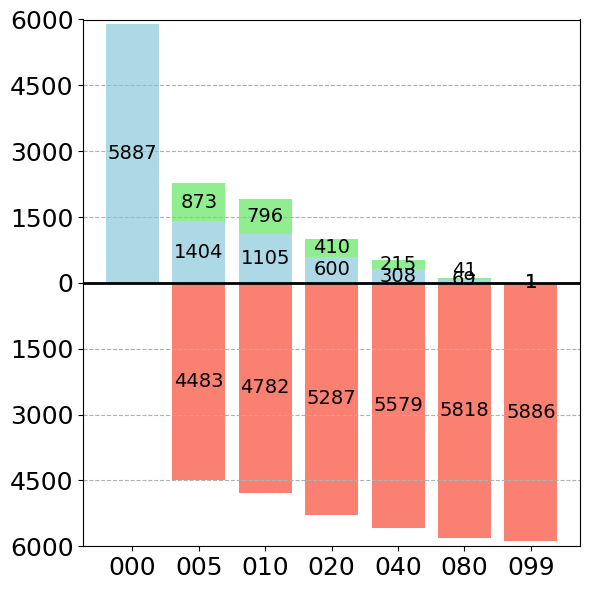

In [16]:
# Create the plot
fig = create_waterfall_plot(diann_result_df)

# Display the plot
plt.show()

In [17]:
def calculate_sensitivity_data(result_df, min_threshold=0.0001, max_threshold=0.05, num_points=500):
    """
    Calculate sensitivity data showing how number of phosphopeptide identifications
    varies with confidence thresholds for each analysis threshold.
    Adapted for UniMod notation in ModifiedPeptide column.
    
    Args:
        result_df: DataFrame containing phosphopeptide analysis results with UniMod modifications
        min_threshold: Minimum confidence threshold to evaluate (default: 0.0001)
        max_threshold: Maximum confidence threshold to evaluate (default: 0.05)
        num_points: Number of threshold points to evaluate (default: 500)
    """
    # Generate evenly spaced thresholds on log scale for confidence evaluation
    thresholds = np.logspace(np.log10(min_threshold), np.log10(max_threshold), num_points)
    
    # Define analysis thresholds to evaluate
    analysis_thresholds = ['000', '005', '010', '020', '040', '080']
    
    # Initialize results dictionary to store counts for each threshold
    results = {thresh: [] for thresh in analysis_thresholds}
    
    # Filter for phosphopeptides using UniMod:21 notation
    phospho_df = result_df[result_df['ModifiedPeptide'].str.contains('UniMod:21', na=False)].copy()
    
    # Calculate identifications for each threshold combination
    for confidence_threshold in thresholds:
        for analysis_threshold in analysis_thresholds:
            # Apply confidence filters with proper NaN handling
            mask = (
                phospho_df[f'{analysis_threshold}_found'] &
                (phospho_df[f'{analysis_threshold}_qval'].fillna(1) <= confidence_threshold) &
                (phospho_df[f'{analysis_threshold}_proba'].fillna(1) <= confidence_threshold)
            )
            
            # Count unique precursors meeting criteria
            unique_precursors = phospho_df[mask]['precursor_id'].nunique()
            results[analysis_threshold].append(unique_precursors)
    
    return thresholds, results

def plot_sensitivity_data(thresholds, results):
    """
    Create sensitivity plot showing identification rates across confidence thresholds.
    Enhanced with improved visual styling and clearer data presentation.
    """
    # Define colors for different analysis thresholds with better contrast
    colors = {
    '000': '#E41A1C',  # Red
    '005': '#377EB8',  # Blue
    '010': '#4DAF4A',  # Green
    '020': '#984EA3',  # Purple
    '040': '#FF7F00',  # Orange
    '080': '#FFFF33'   # Yellow
    }
    
    # Create figure with specified dimensions
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Plot lines for each analysis threshold with enhanced styling
    for threshold in results.keys():
        ax.plot(thresholds, results[threshold], '-', 
                label=f'Threshold {threshold}',
                color=colors[threshold],
                linewidth=2)
    
    # Add reference line at standard threshold (0.01)
    ax.axvline(x=0.01, color='black', linestyle='--', linewidth=1, alpha=0.7,
               label='Confidence Threshold (0.01)')
    
    # Customize axes with clear labeling
    ax.set_xscale('log')
    ax.tick_params(axis='x', labelsize=24)
    
    # Set tick positions and labels for clear reading
    ax.xaxis.set_minor_locator(plt.NullLocator())
    
    # Set y-axis limits and ticks for optimal data display
    ax.set_ylim(0, 3000)
    ax.set_yticks(np.arange(0, 3001, 500))
    ax.set_yticklabels([str(int(y)) for y in np.arange(0, 3001, 500)], 
                       fontsize=24)
    
    # Add grid for better readability
    ax.grid(True, which='major', linestyle='--', alpha=0.7)
    # Add legend with larger font
    
    plt.tight_layout()
    return fig

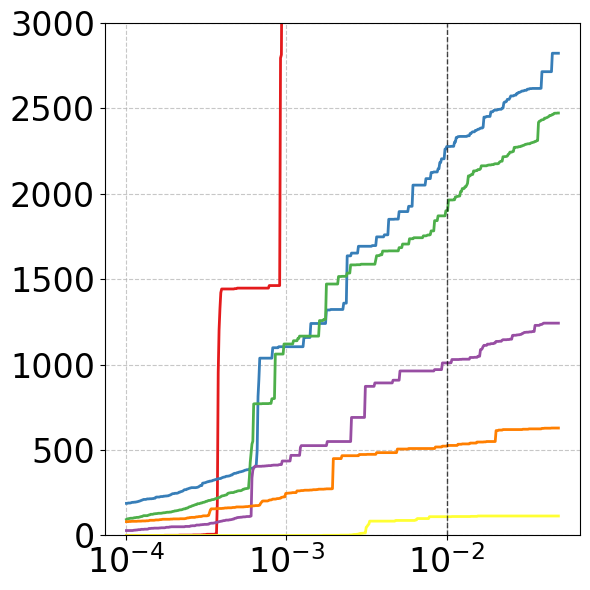

In [18]:
# Calculate the sensitivity data
thresholds, results = calculate_sensitivity_data(diann_result_df)

# Create and display the plot
fig = plot_sensitivity_data(thresholds, results)
plt.show()

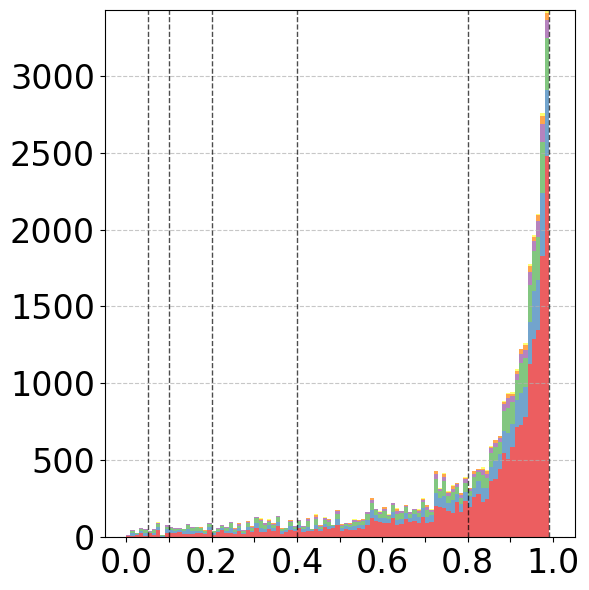

In [19]:
def plot_prediction_distribution_bars_multisite(result_df, qval_threshold=0.01, proba_threshold=0.01, bin_width=0.01, min_label_count=7, overlap_threshold=0):
    """
    Creates an enhanced stacked bar chart showing prediction score distribution for all modification sites.
    
    This version handles multiple prediction sites per peptide, combining all non-NaN predictions
    into a single distribution while maintaining the threshold-based stacking.
    
    Args:
        result_df (pd.DataFrame): DataFrame containing prediction_site1/2/3 columns
        Other parameters remain the same as the original function
    """
    # First, let's collect all valid predictions across sites
    phospho_mask = result_df['ModifiedPeptide'].str.contains(r'\(UniMod:21\)', regex=True, na=False)
    phospho_df = result_df[phospho_mask].copy()
    
    if phospho_df.empty:
        print("No phosphopeptides found with the specified modification.")
        return None
    
    # Create a helper function to collect predictions for a given threshold
    def get_predictions_for_threshold(df, threshold):
        """
        Collects all valid predictions that meet the quality criteria for a given threshold.
        """
        # Apply quality filters
        quality_mask = (
            (df[f'{threshold}_qval'] <= qval_threshold) & 
            (df[f'{threshold}_proba'] <= proba_threshold) &
            (df[f'{threshold}_found'])
        )
        
        # Get predictions from all sites for qualifying peptides
        predictions = []
        for site in range(1, 4):
            site_predictions = df.loc[quality_mask, f'prediction_site{site}'].dropna()
            predictions.extend(site_predictions[(site_predictions >= 0) & (site_predictions <= 1)])
        
        return np.array(predictions)
    
    # Define thresholds and create bins
    thresholds = ['000', '005', '010', '020', '040', '080', '099']
    bins = np.arange(0, 1.0, bin_width)
    bin_centers = bins[:-1] + bin_width / 2
    
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Define colors for each threshold
    colors = ["#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33", "Grey"]
    
    # Collect counts for each threshold
    counts_per_threshold = []
    total_predictions = []
    
    for threshold in thresholds:
        predictions = get_predictions_for_threshold(phospho_df, threshold)
        total_predictions.extend(predictions)
        counts, _ = np.histogram(predictions, bins=bins)
        counts_per_threshold.append(counts)
    
    # Convert counts to numpy array
    counts_per_threshold = np.array(counts_per_threshold)
    
    # Create stacked bar chart
    bottom = np.zeros(len(bins) - 1)
    bars = []
    
    for i, (counts, threshold) in enumerate(zip(counts_per_threshold, thresholds)):
        bar = ax.bar(
            bin_centers, 
            counts, 
            bottom=bottom, 
            width=bin_width,  # Slightly narrower bars for better visibility
            label=f'Threshold {threshold}', 
            color=colors[i], 
            alpha=0.7
        )
        bars.append(bar)
        bottom += counts  # Update bottom for stacking
    
    # Add vertical lines for thresholds (optional: adjust based on your specific needs)
    # Assuming these lines represent specific prediction score values
    threshold_values = [0.05, 0.10, 0.20, 0.40, 0.80, 0.99]
    for val in threshold_values:
        ax.axvline(x=val, color='black', linestyle='--', linewidth=1, alpha=0.7)
    
    # Add gridlines
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
    # Set axis limits
    ax.set_xlim(-0.05, 1.05)
    y_max = counts_per_threshold.sum(axis=0).max() + 3  # Dynamic y-axis based on data
    ax.set_ylim(0, y_max)

    # Format axis ticks
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.set_xticks(np.arange(0, 1.1, 0.1))  # Ticks every 0.1
    # Create labels - empty string for 0.1, 0.3, 0.5, 0.7, 0.9, include 1.0
    labels = [f'{x:.1f}' if (x % 0.2 < 0.01 or x == 1.0) else '' for x in np.arange(0, 1.1, 0.1)]
    ax.set_xticklabels(labels)

    plt.tight_layout()
    return fig

# To use the function:
fig = plot_prediction_distribution_bars_multisite(diann_result_df)
plt.show()

In [20]:
diann_result_df.head()

,precursor_id,run,StrippedPeptide,ModifiedPeptide,proteins,charge,000_found,000_qval,000_proba,005_found,005_qval,005_proba,010_found,010_qval,010_proba,020_found,020_qval,020_proba,040_found,040_qval,040_proba,080_found,080_qval,080_proba,099_found,099_qval,099_proba,prediction_site1,protein_site1,position_site1,prediction_site2,protein_site2,position_site2,prediction_site3,protein_site3,position_site3
125812,AAAAAAAAAAAAAAAASAGGKEAASGPNDS2,tims_phospho_enriched_01,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,P0CG40,2,False,NaN,NaN,True,0.891739,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125813,AAAAAAAAAAAAAAAASAGGKEAASGPNDS2,tims_phospho_enriched_02,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,P0CG40,2,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125814,AAAAAAAAAAAAAAAASAGGKEAASGPNDS2,tims_phospho_enriched_03,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,P0CG40,2,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125815,AAAAAAAAAAAAAAAASAGGKEAASGPNDS2,tims_phospho_enriched_04,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,AAAAAAAAAAAAAAAASAGGKEAASGPNDS,P0CG40,2,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125816,AAAAAAAAAASGAAIPPLIPPRR2,tims_phospho_enriched_01,AAAAAAAAAASGAAIPPLIPPRR,AAAAAAAAAASGAAIPPLIPPRR,O14654,2,False,NaN,NaN,True,0.406450,1.0,False,NaN,NaN,True,0.61416,1.0,False,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
def analyze_identification_losses_multisite(result_df, baseline_threshold='000', confidence_threshold=0.01):
    """
    Analyzes phosphopeptide identification losses considering all modification sites.
    A peptide is considered lost due to prediction cutoff if any of its modification
    sites falls below the threshold.
    
    Args:
        result_df: DataFrame with prediction_site1/2/3 columns for multiple modifications
        baseline_threshold: Starting threshold to compare against (default '000')
        confidence_threshold: Q-value and probability cutoff for high confidence (default 0.01)
    
    Returns:
        tuple: (results dictionary, list of thresholds analyzed)
    """
    # Get thresholds excluding baseline
    thresholds = sorted([t for t in ['000', '005', '010', '020', '040', '080', '099'] 
                        if t != baseline_threshold])
    
    # Filter for phosphopeptides
    phospho_mask = result_df['ModifiedPeptide'].str.contains('UniMod:21', na=False)
    phospho_df = result_df[phospho_mask].copy()
    
    # Get baseline high-confidence identifications
    baseline_mask = (
        phospho_df[f'{baseline_threshold}_found'] & 
        (phospho_df[f'{baseline_threshold}_qval'].fillna(1) <= confidence_threshold) & 
        (phospho_df[f'{baseline_threshold}_proba'].fillna(1) <= confidence_threshold)
    )
    baseline_ids = set(phospho_df[baseline_mask]['precursor_id'])
    
    # Initialize results dictionary
    results = {}
    
    for threshold in thresholds:
        # Get high-confidence identifications for this threshold
        threshold_mask = (
            phospho_df[f'{threshold}_found'] & 
            (phospho_df[f'{threshold}_qval'].fillna(1) <= confidence_threshold) & 
            (phospho_df[f'{threshold}_proba'].fillna(1) <= confidence_threshold)
        )
        threshold_ids = set(phospho_df[threshold_mask]['precursor_id'])
        lost_ids = baseline_ids - threshold_ids
        
        loss_reasons = {
            'Prediction Cutoff': 0,
            'Not Found': 0,
            'Confidence Decrease': 0
        }
        
        for lost_id in lost_ids:
            peptide_data = phospho_df[phospho_df['precursor_id'] == lost_id].iloc[0]
            
            # Check if peptide was found at all
            if not peptide_data[f'{threshold}_found']:
                # Check all prediction sites
                predictions = [
                    peptide_data[f'prediction_site{i}'] 
                    for i in range(1, 4)
                    if not pd.isna(peptide_data[f'prediction_site{i}'])
                ]
                
                if predictions:  # If we have any valid predictions
                    threshold_value = float(threshold)/100
                    # If any site is below threshold, count as prediction cutoff
                    if any(pred < threshold_value for pred in predictions):
                        loss_reasons['Prediction Cutoff'] += 1
                    else:
                        loss_reasons['Not Found'] += 1
                else:
                    loss_reasons['Not Found'] += 1
                continue
            
            # If found but didn't pass confidence thresholds
            qval = peptide_data[f'{threshold}_qval']
            proba = peptide_data[f'{threshold}_proba']
            
            qval_fails = np.isnan(qval) or qval > confidence_threshold
            proba_fails = np.isnan(proba) or proba > confidence_threshold
            
            if qval_fails or proba_fails:
                loss_reasons['Confidence Decrease'] += 1
            else:
                loss_reasons['Not Found'] += 1
        
        results[threshold] = loss_reasons
        
        # Print detailed statistics for each threshold
        print(f"\nThreshold {threshold} analysis:")
        print(f"Total lost identifications: {len(lost_ids)}")
        for reason, count in loss_reasons.items():
            print(f"{reason}: {count} ({count/len(lost_ids)*100:.1f}%)")
    
    return results, thresholds

# The plotting function remains the same as it just visualizes the results
def plot_identification_losses(results, thresholds, ymax=7000):
    """
    Creates a bar plot showing the distribution of reasons for lost identifications
    across different prediction score thresholds.
    """
    # Create plot
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Define colors for each category
    colors = {
        'Prediction Cutoff': '#FF0000',    # Red
        'Not Found': '#660099',            # Purple
        'Confidence Decrease': '#0000FF'    # Blue
    }
    
    # Width of each bar
    bar_width = 0.25
    
    # Create positions for bars
    x = np.arange(len(thresholds))
    
    # Plot bars side by side
    reasons = list(colors.keys())
    for i, reason in enumerate(reasons):
        values = [results[threshold][reason] for threshold in thresholds]
        position = x + (i - 1) * bar_width
        bars = ax.bar(position, values, bar_width,
                     label=reason,
                     color=colors[reason])
        
        # Add value labels on bars
        for j, rect in enumerate(bars):
            height = rect.get_height()
            if height > 0:  # Only label non-zero bars
                ax.text(rect.get_x() + rect.get_width()/2., height,
                       f'{int(height)}',
                       ha='center', va='bottom',
                       fontsize=8)
    
    

    
    # Set x-axis ticks
    ax.set_xticks(x)
    ax.set_xticklabels(thresholds, rotation=0, fontsize=11)
    
    # Customize y-axis
    ax.tick_params(axis='y', labelsize=11)
    ax.yaxis.grid(True, linestyle='--', alpha=1.0)
    ax.set_axisbelow(True)
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Set y-axis limits if specified
    if ymax is not None:
        ax.set_ylim(0, ymax)
        yticks = np.arange(0, ymax+1, 5000)
        ax.set_yticks(yticks)
    
    plt.tight_layout()
    return fig
# We can use it with our new analysis:


Threshold 005 analysis:
Total lost identifications: 4483
Prediction Cutoff: 31 (0.7%)
Not Found: 4202 (93.7%)
Confidence Decrease: 250 (5.6%)

Threshold 010 analysis:
Total lost identifications: 4782
Prediction Cutoff: 71 (1.5%)
Not Found: 4663 (97.5%)
Confidence Decrease: 48 (1.0%)

Threshold 020 analysis:
Total lost identifications: 5287
Prediction Cutoff: 185 (3.5%)
Not Found: 4987 (94.3%)
Confidence Decrease: 115 (2.2%)

Threshold 040 analysis:
Total lost identifications: 5579
Prediction Cutoff: 464 (8.3%)
Not Found: 5109 (91.6%)
Confidence Decrease: 6 (0.1%)

Threshold 080 analysis:
Total lost identifications: 5818
Prediction Cutoff: 1726 (29.7%)
Not Found: 4092 (70.3%)
Confidence Decrease: 0 (0.0%)

Threshold 099 analysis:
Total lost identifications: 5886
Prediction Cutoff: 5421 (92.1%)
Not Found: 465 (7.9%)
Confidence Decrease: 0 (0.0%)


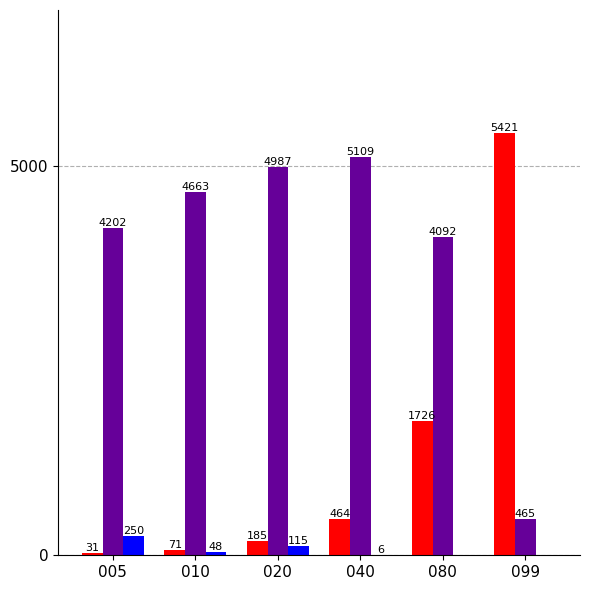

In [22]:
# Run the analysis
results, thresholds = analyze_identification_losses_multisite(diann_result_df)

# Create the plot
fig = plot_identification_losses(results, thresholds)
plt.show()